In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
Policies=pd.read_csv("FrankPolicies/TravelPlansSample.csv")

In [6]:
Annual=Policies.loc[Policies.travel_days=="Annual"].reset_index(drop=True)

In [7]:
Benefits=['age_group', 'plan_type', 
       'loss_of_life', 'medical_expenses', 'emergency_services',
       'medical_evacuation_and_repatriation',
       'continuation_of_medical_treatement_in_country',
       'repatriation_of_mortal_remains', 'daily_compensation_total',
       'daily_compensation_day', 'loss_of_luggage_or_assets',
       'delay_of_luggage', 'cancellation_and_reduction_in_travel_days',
       '3rd_party_damages', 'delay_of_flights', 'hijacking_of_flight_total',
       'hijacking_of_flight_day', 'compassionate_visitation_benefit',
       'emergency_calling_via_telephone', 'loss_or_damage_of_travel_documents',
       'loss_of_money']

In [8]:
Policies["Annual_Price"]=0
for i in Annual.index:
  index_of_sames=(Policies.loc[:,Benefits]==Annual.loc[i,Benefits]).all(1)
  Policies.loc[index_of_sames,"Annual_Price"]=Annual.loc[i,"total_premium"]


In [9]:
Policies.drop(Policies[Policies.region_code=="YI"].index,inplace=True)
Policies.drop(Policies[Policies.travel_days=="Annual"].index,inplace=True)

In [63]:
Policies["Trips_Equivalent"]=Policies["Annual_Price"]/Policies["total_premium"]
Policies["Total_Days"]=Policies["Trips_Equivalent"]*(pd.to_numeric(Policies["travel_days"]))


In [155]:
Policies.groupby(["plan_type"])

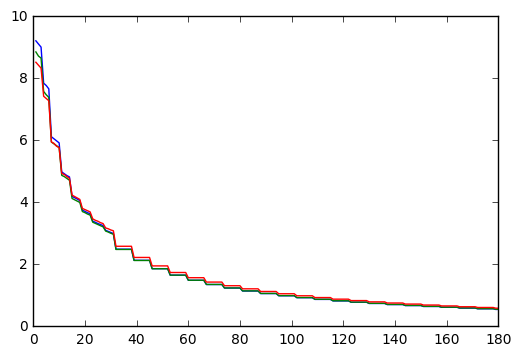

In [132]:
ax = plt.axes()

for i in Policies.plan_type.unique():
  plan_index=Policies.plan_type==i
  ax.plot(Policies.loc[plan_index,"travel_days"],Policies.loc[plan_index,"Trips_Equivalent"])

In [96]:
### Regression
import statsmodels.api as sm

X = pd.to_numeric(Policies.loc[plan_index,"travel_days"]) ## X usually means our input variables (or independent variables)
y = 1/Policies.loc[plan_index,"Trips_Equivalent"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)

In [104]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Trips_Equivalent   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.210e+05
Date:                Fri, 06 Dec 2019   Prob (F-statistic):          4.31e-254
Time:                        09:49:40   Log-Likelihood:                 471.20
No. Observations:                 180   AIC:                            -938.4
Df Residuals:                     178   BIC:                            -932.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const           0.0819      0.003     30.824      0.000         0.077     0.087
travel_days     0.0089   2.55e-05    347.869      0.000         0.009     0.009
==============================================================================
Omnibus:                       63.477   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.434
Skew:                          -0.116   Prob(JB):                      0.00542
Kurtosis:                       1.844   Cond. No.                         210.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
td_x=20
1/(model.params.const + model.params.travel_days*td_x)

3.85933642737126

In [129]:
average_days=np.arange(180)
trips_equivalent=1/(model.params.const + model.params.travel_days*average_days)
table=pd.DataFrame(trips_equivalent)
table.reset_index(inplace=True)
table.columns=["average_days","trips_equivalent"]
table.drop(0,inplace=True)

In [131]:
table.to_csv("Trips Equivalant for Annual")